In [1]:
#usual stuff
import numpy as np
from astropy.io import fits
location_of_files = '/home/secco/project2-kicp-secco/delve/PSF_FILES/'

In [2]:
#stuff needed to load PSF files and measure shapes 
import galsim
from galsim.des import DES_PSFEx
import ngmix
from ngmix.fitting import Fitter as LMSimple
from ngmix.admom import AdmomFitter as Admom

In [101]:
#loading CCD image and starlist and psf model for a given CCD and expnum
#im = fits.open(location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz")
im = galsim.fits.read(location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz")
starlist = fits.open(location_of_files+"D00145430_z_c01_r4148p01_psfex-starlist.fits")
des_psfex = galsim.des.DES_PSFEx(location_of_files+'D00145430_z_c01_r4148p01_psfexcat.psf') #loads the model over the ccd, presumably
des_psfex_with_image = galsim.des.DES_PSFEx(location_of_files+'D00145430_z_c01_r4148p01_psfexcat.psf',
                                         location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz")

#get the pixel location of the first star that passes flagging:
goodstars= np.where(starlist[2].data['flags_psf']==0)[0] #flags for good stars
Y = starlist[2].data['x_image'].astype(int)[goodstars[0]] #note that I'm exchanging X and Y here!!!
X = starlist[2].data['y_image'].astype(int)[goodstars[0]]
Y_float = starlist[2].data['x_image'][goodstars[0]] #getting them as floats also (as in the file itself)
X_float = starlist[2].data['y_image'][goodstars[0]]


print(X,Y)

73 1664


In [111]:
starlist[2].header

XTENSION= 'BINTABLE'           / THIS IS A BINARY TABLE (FROM THE LDACTOOLS)    
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                   78 / BYTES PER ROW                                  
NAXIS2  =                  441 / NUMBER OF ROWS                                 
PCOUNT  =                    0 / RANDOM PARAMETER COUNT                         
GCOUNT  =                    1 / GROUP COUNT                                    
TFIELDS =                   15 / FIELDS PER ROWS                                
EXTNAME = 'LDAC_OBJECTS'       / TABLE NAME                                     
TTYPE1  = 'SOURCE_NUMBER'      / Source index                                   
TFORM1  = '1J      '                                                            
TDISP1  = 'I10     '                                                            
TTYPE2  = 'EXTENSION'       

<IPython.core.display.Javascript object>


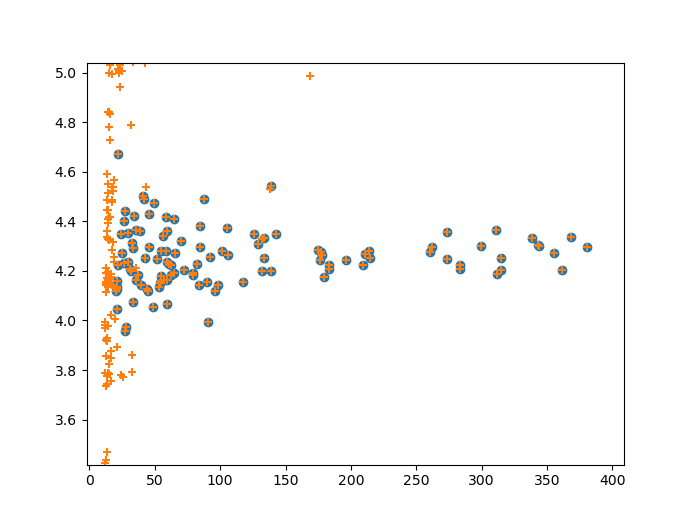

In [8]:
%matplotlib notebook
import matplotlib.pyplot as pl
from astropy.io import fits
import numpy as np
location_of_files = '/home/secco/project2-kicp-secco/delve/PSF_FILES/'
starlist = fits.open(location_of_files+"D00145430_z_c01_r4148p01_psfex-starlist.fits")
goodstars= np.where(starlist[2].data['flags_psf']==0)[0] #flags for good stars

pl.figure()
pl.scatter(starlist[2].data['SNR_PSF '][goodstars],starlist[2].data['FWHM_PSF'][goodstars])
pl.scatter(starlist[2].data['SNR_PSF '],starlist[2].data['FWHM_PSF'],marker='+')
pl.show()

In [47]:
im.array.shape

(4096, 2048)

In [50]:
b=galsim.BoundsI(X-16,X+16,Y-16,Y+16)

In [51]:
im[b] #cropped postage stamp with all metadata included

galsim.Image(bounds=galsim.BoundsI(xmin=57, xmax=89, ymin=1648, ymax=1680), array=
array([[ 32.143158 ,  71.4345   ,  26.06789  , ...,  80.37729  ,
        -43.98153  ,  -1.5374336],
       [ 62.08331  ,  52.012035 ,  70.20999  , ..., -28.544657 ,
         59.453274 , -33.627113 ],
       [ 54.831917 , -47.13021  ,  40.36633  , ...,  51.598297 ,
         31.230438 , -18.06287  ],
       ...,
       [ 40.702698 ,   2.151432 ,  -5.044939 , ...,  22.79139  ,
         37.249916 ,  87.16239  ],
       [-19.557243 ,  27.883522 ,  16.955173 , ...,  13.999779 ,
         -7.553177 , -56.209274 ],
       [-23.569553 , -49.95813  ,  74.41755  , ...,  41.235184 ,
         37.01473  ,  33.450096 ]], dtype=float32), wcs=galsim.GSFitsWCS(_data = ['TPV', array([13436.0684648, 6309.83416837]), array([[-1.551332999498e-07, 7.307773283867e-05], [-7.285470206898e-05, -1.744544809255e-08]]), coord.CelestialCoord(coord.Angle(0.011141011370512025, coord.radians), coord.Angle(-0.5184140179911148, coord.radian

In [54]:
newim= im[b].copy()

In [55]:
psf_image = galsim.draw

galsim.Image(bounds=galsim.BoundsI(xmin=57, xmax=89, ymin=1648, ymax=1680), array=
array([[ 32.143158 ,  71.4345   ,  26.06789  , ...,  80.37729  ,
        -43.98153  ,  -1.5374336],
       [ 62.08331  ,  52.012035 ,  70.20999  , ..., -28.544657 ,
         59.453274 , -33.627113 ],
       [ 54.831917 , -47.13021  ,  40.36633  , ...,  51.598297 ,
         31.230438 , -18.06287  ],
       ...,
       [ 40.702698 ,   2.151432 ,  -5.044939 , ...,  22.79139  ,
         37.249916 ,  87.16239  ],
       [-19.557243 ,  27.883522 ,  16.955173 , ...,  13.999779 ,
         -7.553177 , -56.209274 ],
       [-23.569553 , -49.95813  ,  74.41755  , ...,  41.235184 ,
         37.01473  ,  33.450096 ]], dtype=float32), wcs=galsim.GSFitsWCS(_data = ['TPV', array([13436.0684648, 6309.83416837]), array([[-1.551332999498e-07, 7.307773283867e-05], [-7.285470206898e-05, -1.744544809255e-08]]), coord.CelestialCoord(coord.Angle(0.011141011370512025, coord.radians), coord.Angle(-0.5184140179911148, coord.radian

In [9]:
starlist.info()

Filename: /home/secco/project2-kicp-secco/delve/PSF_FILES/D00145430_z_c01_r4148p01_psfex-starlist.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  LDAC_IMHEAD    1 BinTableHDU     12   1R x 1C   [560A]   
  2  LDAC_OBJECTS    1 BinTableHDU     60   441R x 15C   ['1J', '1I', '1J', '1J', '2D', '1D', '1D', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E']   


In [18]:
#look at loaded psf model:
psf_pos= galsim.PositionD(X_float, Y_float)
psf_model = des_psfex_with_image.getPSF(psf_pos)
psf_model_no_image = des_psfex.getPSF(psf_pos)
print(des_psfex_with_image.getLocalWCS(psf_pos))

galsim.JacobianWCS(0.0016379622971112993, -0.2628022785644671, -0.26247832371320895, -0.0012772030382854605)


In [9]:
psf_model

galsim.Transformation(galsim.InterpolatedImage(galsim.Image(bounds=galsim.BoundsI(xmin=-30, xmax=30, ymin=-30, ymax=30), array=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), wcs=galsim.PixelScale(0.69999999)), galsim.Lanczos(3, True, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), galsim.Quintic(gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), pad_factor=4.000000, flux=1, offset=galsim.PositionD(x=0.0, y=0.0), use_true_center=False, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05), _force_stepk=0.2274770189533531, _force_maxk=4.523051987752119), jac=[[0.0013585495365563852, -0.26285253755882354], [-0.262313330299569, -0.0009783962761690844]], offset=

In [15]:
psf_model_no_image

galsim.InterpolatedImage(galsim.Image(bounds=galsim.BoundsI(xmin=-30, xmax=30, ymin=-30, ymax=30), array=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), wcs=galsim.PixelScale(0.69999999)), galsim.Lanczos(3, True, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), galsim.Quintic(gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), pad_factor=4.000000, flux=1, offset=galsim.PositionD(x=0.0, y=0.0), use_true_center=False, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05), _force_stepk=0.2274770189533531, _force_maxk=4.523051987752119)

In [21]:
#now get the image and weight cutouts for that stars, for a box of a given size
box=11 #
image_cutout = im['sci'].data[ X-box:X+box , Y-box:Y+box ]
weight_cutout = im['wgt'].data[ X-box:X+box , Y-box:Y+box ]
#there's another extension in the immasked file called 'MSK' which stands for mask, 
#not sure how to use it but loading it below
mask_cutout = im['msk'].data[ X-box:X+box , Y-box:Y+box ]

In [61]:
#position at which we want the PSF
psf_pos= galsim.PositionD(Y_float, X_float) #no switching twice

#also create the PSF model image:
#psf_model = des_psfex.getPSF(psf_pos)
#psf_image = psf_model.drawImage(scale=0.263,nx=34,ny=34,method='no_pixel') 
#psf_image_array = psf_image.array

#and attempt the same things with the PSF model loaded with the entire image:
psf_model_with_image = des_psfex_with_image.getPSF(psf_pos)
psf_wcs = des_psfex_with_image.getLocalWCS(psf_pos) #this should be the same wcs used by the actual star 
psf_image_with_image = psf_model_with_image.drawImage(wcs=psf_wcs,nx=34,ny=34,method='no_pixel') 

#psf_model_with_image.drawImage(image=newim,method='no_pixel') 

psf_image_with_image_array = psf_image_with_image.array

np.save(location_of_files+'psfmodel.npy',psf_image_with_image_array)

<IPython.core.display.Javascript object>


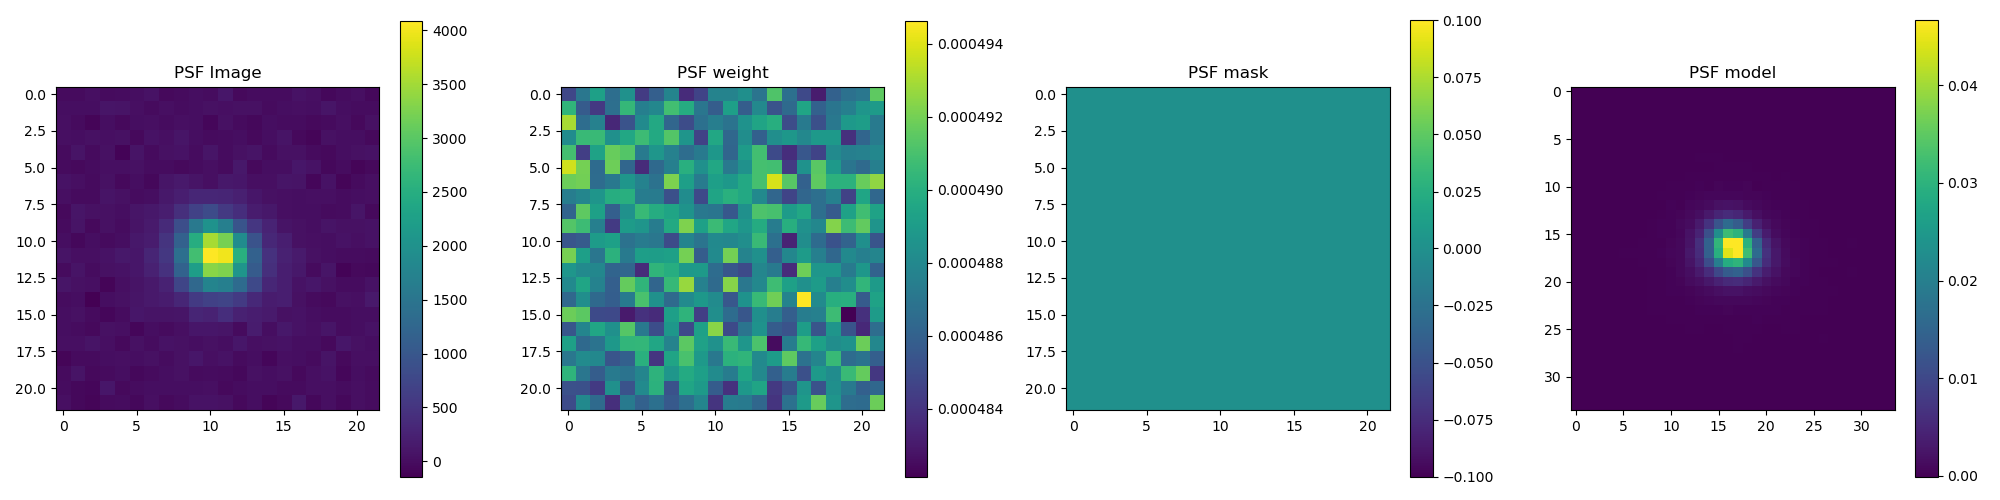

In [7]:
#this is what each of these arrays look like:
%matplotlib notebook
import matplotlib.pyplot as pl

pl.figure(figsize=(20,5))
pl.subplot(141)
pl.title('PSF Image')
pl.imshow(image_cutout)
pl.colorbar()
pl.subplot(142)
pl.title('PSF weight')
pl.imshow(weight_cutout)
pl.colorbar()
pl.subplot(143)
pl.title('PSF mask')
pl.imshow(mask_cutout)
pl.colorbar()
pl.subplot(144)
pl.title('PSF model')
psf_image_array=np.load(location_of_files+'psfmodel.npy')
pl.imshow(psf_image_array)
pl.colorbar()
pl.tight_layout()
pl.show()

In [87]:
print(image_cutout.shape)
print(psf_image_with_image_array.shape)
print(psf_image_array.shape)

(22, 22)
(34, 34)
(34, 34)


In [64]:
#now create an NGMix object which we will measure the shapes over
diagjac1 = ngmix.DiagonalJacobian(row=11,col=11, scale=0.263)
fulljac1 = ngmix.DiagonalJacobian(row=11,col=11, wcs=psf_wcs)

obs = ngmix.Observation(
    image=image_cutout,
    weight=weight_cutout,
    jacobian=diagjac1) #x and y are the center of the jacobian, assuming for now a diagonal jacobian

#measure shape of star:
rng = np.random.RandomState(seed=30)
try:
    am = Admom(rng=rng)
    res = am.go(obs, 0.5)
    if res['flags'] != 0:
        print('image got flagged(?)')

    lm = LMSimple('gauss')
    lm_res = lm.go(obs, res['pars'])
    if lm_res['flags'] == 0:
        print('success in star')
        _g1 = lm_res['pars'][2]
        _g2 = lm_res['pars'][3]
        _T = lm_res['pars'][4]
except ngmix.gexceptions.GMixRangeError:
    print('NGmix error')
else:
    print('Got for star: g1=%1.4f, g2=%1.4f, T=%1.4f'%(_g1,_g2,_T))
    
#now do the same for psf model 
obs = ngmix.Observation(
image=psf_image_with_image_array.T,
weight=np.ones(psf_image_with_image_array.shape),
jacobian=ngmix.Jacobian(row=17,col=17, wcs=psf_wcs)) 

#measure shape
rng = np.random.RandomState(seed=42)
try:
    am = Admom(rng=rng)
    res = am.go(obs, 0.5)
    if res['flags'] != 0:
        print('image got flagged(?)')
        print(res['flags'])

    lm = LMSimple('gauss')
    lm_res = lm.go(obs, res['pars'])
    if lm_res['flags'] == 0:
        print('success in model')
        _g1 = lm_res['pars'][2]
        _g2 = lm_res['pars'][3]
        _T = lm_res['pars'][4]
except ngmix.gexceptions.GMixRangeError:
    print('NGmix error')
else:
    print('Got for psf model: g1=%1.4f, g2=%1.4f, T=%1.4f'%(_g1,_g2,_T))


success in star
Got for star: g1=0.0073, g2=0.0457, T=0.3917
success in model
Got for psf model: g1=0.0113, g2=0.0471, T=0.3810


## seems to be more or less working for one star, now loop over all the stars in the CCD

In [3]:
im = galsim.fits.read(location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz")
starlist = fits.open(location_of_files+"D00145430_z_c01_r4148p01_psfex-starlist.fits")
#des_psfex = galsim.des.DES_PSFEx(location_of_files+'D00145430_z_c01_r4148p01_psfexcat.psf') #loads the model over the ccd, presumably
des_psfex = galsim.des.DES_PSFEx(location_of_files+'D00145430_z_c01_r4148p01_psfexcat.psf',location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz")

#get the pixel location of the first star that passes flagging:
goodstars= np.where(starlist[2].data['flags_psf']==0)[0] 
print('will loop over %d stars in this CCD'%len(goodstars))

will loop over 127 stars in this CCD


In [5]:
im = galsim.fits.read(location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz")
w = galsim.fits.read(location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz",hdu=3)
starlist = fits.open(location_of_files+"D00145430_z_c01_r4148p01_psfex-starlist.fits")
#des_psfex = galsim.des.DES_PSFEx(location_of_files+'D00145430_z_c01_r4148p01_psfexcat.psf') #loads the model over the ccd, presumably
des_psfex = galsim.des.DES_PSFEx(location_of_files+'D00145430_z_c01_r4148p01_psfexcat.psf',location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz")

#get the pixel location of the first star that passes flagging:
#goodstars= np.where(starlist[2].data['flags_psf']==0)[0] 
print('will loop over %d stars in this CCD'%len(goodstars))
stampsize=24
rng = np.random.RandomState(seed=42)
for i in goodstars[0:1]:
    X = starlist[2].data['x_image'].astype(int)[i] 
    Y = starlist[2].data['y_image'].astype(int)[i]
    X_float = starlist[2].data['x_image'][i] #getting them as floats also (as in the file itself)
    Y_float = starlist[2].data['y_image'][i]
    newbounds = galsim.BoundsI(X-stampsize/2,X+stampsize/2,Y-stampsize/2,Y+stampsize/2)
    print(newbounds)
    print(X,Y)
    image_cutout = im[newbounds].array
    weight_cutout = w[newbounds].array
    #position where we want the PSF
    

will loop over 127 stars in this CCD
galsim.BoundsI(1652,1676,61,85)
1664 73


In [6]:
im

galsim.Image(bounds=galsim.BoundsI(xmin=1, xmax=2048, ymin=1, ymax=4096), array=
array([[ 1.31939685e+03,  5.43219566e+00,  2.70725517e+01, ...,
         2.72079964e+01, -5.66491842e+00,  9.87199341e+02],
       [ 1.53574475e+03,  5.75606155e+01,  2.35843315e+01, ...,
         3.19422770e+00, -1.31887608e+01,  1.20712012e+03],
       [ 1.45246216e+03,  1.44855471e+01,  2.76947937e+01, ...,
         2.12700729e+01, -2.78569603e+01,  1.25282141e+03],
       ...,
       [ 1.20396032e+01,  9.69487457e+01,  3.20552177e+01, ...,
         5.25942307e+01, -6.52957821e+00,  6.83541794e+01],
       [ 1.50435705e+01,  1.41122341e+01,  3.35161304e+00, ...,
        -1.55671196e+01, -2.97515926e+01,  7.97531605e+00],
       [ 1.31092432e+04, -8.51712344e+04, -2.37298262e+04, ...,
         2.80206914e+04,  1.41187285e+04,  2.25223906e+04]], dtype=float32), wcs=galsim.GSFitsWCS(_data = ['TPV', array([13436.0684648, 6309.83416837]), array([[-1.551332999498e-07, 7.307773283867e-05], [-7.285470206898e-05

In [100]:
    psf_pos = galsim.PositionD(X, Y)
    psf_model = des_psfex.getPSF(psf_pos)
    
    copy_stamp = im[newbounds].copy() #copies the galsim object with wcs and everything
    psf_image=psf_model.drawImage(image=copy_stamp,method='no_pixel')
    
    psf_wcs = des_psfex.getLocalWCS(psf_pos)
    
    star_obs = ngmix.Observation(
    image=image_cutout,
    weight=weight_cutout,
    jacobian=ngmix.Jacobian(row=im[newbounds].center.x, col=im[newbounds].center.y, wcs=psf_wcs))
    
    psf_model_obs = ngmix.Observation(
    image=psf_image.array,
    weight=np.ones(psf_image.array.shape),
    jacobian=ngmix.Jacobian(row=im[newbounds].center.x, col=im[newbounds].center.y, wcs=psf_wcs))
    
    for obs in [star_obs, psf_model_obs]:
        try:
            am = Admom(rng=rng)
            res = am.go(obs, 0.5)
            if res['flags'] != 0:
                print('image got flagged(?)')
                print(res['flags'])

            lm = LMSimple('gauss')
            lm_res = lm.go(obs, res['pars'])
            if lm_res['flags'] == 0:
                print('success in model')
                _g1 = lm_res['pars'][2]
                _g2 = lm_res['pars'][3]
                _T = lm_res['pars'][4]
        except ngmix.gexceptions.GMixRangeError:
            print('NGmix error')
        else:
            print('Got: g1=%1.4f, g2=%1.4f, T=%1.4f'%(_g1,_g2,_T))
    '''
    #get star postage stamp:
    image_cutout = im['sci'].data[ X-box:X+box , Y-box:Y+box ]
    weight_cutout = im['wgt'].data[ X-box:X+box , Y-box:Y+box ]    
    
    #position at which we want the PSF
    psf_pos= galsim.PositionD(Y_float, X_float)

    #create the model PSF image
    psf_model = des_psfex.getPSF(psf_pos)
    psf_wcs = des_psfex.getLocalWCS(psf_pos)
    psf_image = psf_model.drawImage(wcs=psf_wcs,nx=34,ny=34) 
    psf_image_array = psf_image.array
    '''
    

will loop over 127 stars in this CCD
galsim.BoundsI(1652,1676,61,85)
1664 73
image got flagged(?)
68
Got for psf model: g1=0.0113, g2=0.0471, T=0.3810
image got flagged(?)
68
Got for psf model: g1=0.0113, g2=0.0471, T=0.3810


In [95]:
im[newbounds].wcs

galsim.GSFitsWCS(_data = ['TPV', array([13436.0684648, 6309.83416837]), array([[-1.551332999498e-07, 7.307773283867e-05], [-7.285470206898e-05, -1.744544809255e-08]]), coord.CelestialCoord(coord.Angle(0.011141011370512025, coord.radians), coord.Angle(-0.5184140179911148, coord.radians)), array([[[0.002472885140048, -0.005499787049651, 0.004171361474035, -0.00129325095475], [1.011742476714, -0.01953849950577, 0.00770954752186, 0.0], [0.007714699760701, -0.0065723817126, 0.0, 0.0], [0.000532715892002, 0.0, 0.0, 0.0]], [[-0.009648018320751, 1.031295201068, -0.03415337795493, 0.0122957975843], [-0.009762337555345, 0.01711295919738, -0.00840570484038, 0.0], [-0.01042915609031, 0.00835807668638, 0.0, 0.0], [-0.00214726148906, 0.0, 0.0, 0.0]]]), None, None])

In [ ]:
im = galsim.fits.read(location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz")

In [75]:
imfits = fits.open(location_of_files+"D00145430_z_c01_r4148p01_immasked.fits.fz")

In [76]:
imfits.info()

Filename: /home/secco/project2-kicp-secco/delve/PSF_FILES/D00145430_z_c01_r4148p01_immasked.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SCI           1 CompImageHDU    303   (2048, 4096)   float32   
  2  MSK           1 CompImageHDU     65   (2048, 4096)   int16   
  3  WGT           1 CompImageHDU     19   (2048, 4096)   float32   
